# Conway's Game of Life
Game of Life is a 2D Cellular Automaton. Each cell is alive or dead, and has 8 neighbors: north, south, east, west, and the diagonals (a Moore neighborhood). Here is the rule that Conway came up with to govern the Game of Life. The rule is loosely analagous to cell growth, where cells that are isolated or overcrowded die.

| current state | num neighbors | next state |
|---------------|---------------|------------|
| live          | 2-3           | live       |
| live          | 0-1, 4-8      | dead       |
| dead          | 3             | live       |
| dead          | 0-2, 4-8      | dead       |

In [1]:
import numpy as np
a = np.random.randint(2, size=(10, 10)).astype(np.uint8)
print(a)

[[0 1 1 1 0 1 0 1 0 1]
 [1 0 0 1 0 0 0 1 1 0]
 [0 1 0 1 0 1 0 1 0 1]
 [0 1 1 1 0 1 0 0 0 1]
 [1 0 0 1 1 0 0 0 0 0]
 [0 1 1 1 0 1 0 0 0 0]
 [0 1 1 0 1 1 1 0 0 1]
 [1 0 1 0 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 0 0 0 1 1 1 1]]


In [2]:
b = np.zeros_like(a)
rows, cols = a.shape
for i in range(1, rows-1):
    for j in range(1, cols-1):
        state = a[i, j]
        neighbors = a[i-1:i+2, j-1:j+2]  # Moore neighborhood
        k = np.sum(neighbors) - state
        if state:
            if k==2 or k==3:
                b[i, j] = 1
        else:
            if k == 3:
                b[i, j] = 1

print(b)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0]
 [0 1 0 1 0 0 0 1 0 0]
 [0 1 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [3]:
from scipy.signal import correlate2d

# Use kernel for cross-correlation
kernel = np.array([[1, 1, 1],
                   [1,10, 1],
                   [1, 1, 1]])

# Make table
table = np.zeros(20, dtype=np.uint8)
table[[3, 12, 13]] = 1

c = correlate2d(a, kernel, mode='same')
b = table[c]
print(b)

[[0 1 1 1 1 0 1 1 0 0]
 [1 0 0 1 0 0 0 1 0 1]
 [1 1 0 1 0 0 0 1 0 1]
 [1 1 0 0 0 1 1 0 1 0]
 [1 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 1 1 0]
 [1 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 0 1 1 1 0]]


In [4]:
import matplotlib
%matplotlib inline

width = 10
height = 8
matplotlib.rcParams['figure.figsize'] = (width, height)

from thinkcomplexity.game_of_life import Life, LifeViewer

def make_viewer(n, m, row, col, *strings):
    """Makes a Life and LifeViewer object.
    
    n, m: rows and columns of the Life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    life = Life(n, m)
    life.add_cells(row, col, *strings)
    viewer = LifeViewer(life)
    return viewer

# Game of Life entities

## Still life

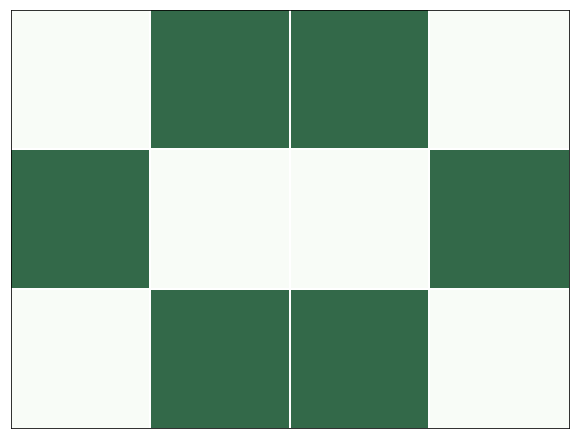

In [5]:
# Beehive
viewer = make_viewer(3, 4, 0, 0, '0110', '1001', '0110')
viewer.draw(grid=True)

# Oscillator

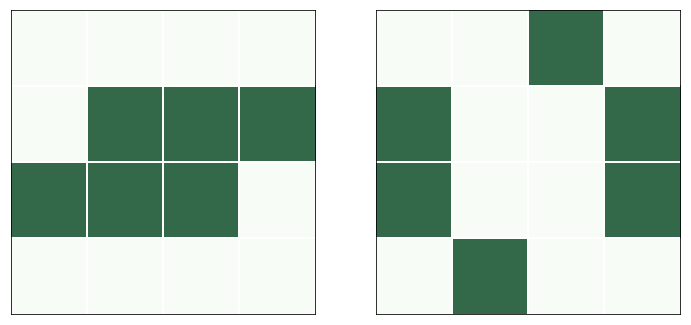

In [6]:
# Toad
import thinkplot

thinkplot.preplot(cols=2)
viewer = make_viewer(4, 4, 1, 0, '0111', '1110')
viewer.draw(grid=True)

thinkplot.subplot(2)
viewer.step()
viewer.draw(grid=True)

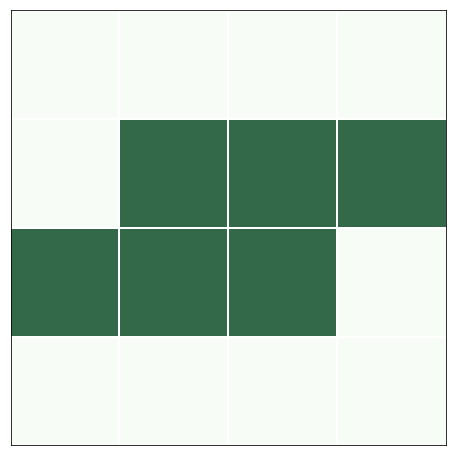

In [7]:
from matplotlib import rc
rc('animation', html='html5')

viewer.step()
anim = viewer.animate(frames=4, interval=400, grid=True)

In [8]:
anim

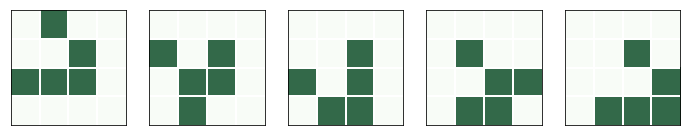

In [9]:
# Glider
glider = ['010', '001', '111']

thinkplot.preplot(cols=5)
viewer = make_viewer(4, 4, 0, 0, *glider)
viewer.draw(grid=True)

for i in range(2, 6):
    viewer.step()
    thinkplot.subplot(i)
    viewer.draw(grid=True)

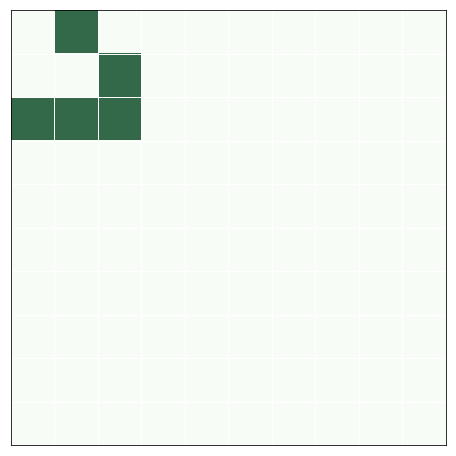

In [10]:
viewer = make_viewer(10, 10, 0, 0, '010', '001', '111')
anim = viewer.animate(frames=32, interval=200, grid=True)

In [11]:
anim

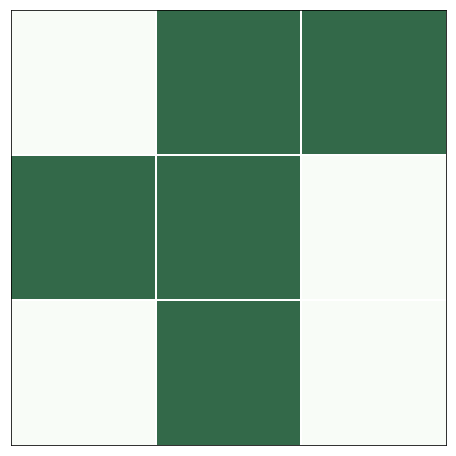

In [12]:
# r pentomino
rpent = ['011', '110', '010']

viewer = make_viewer(3, 3, 0, 0, *rpent)
viewer.draw(grid=True)

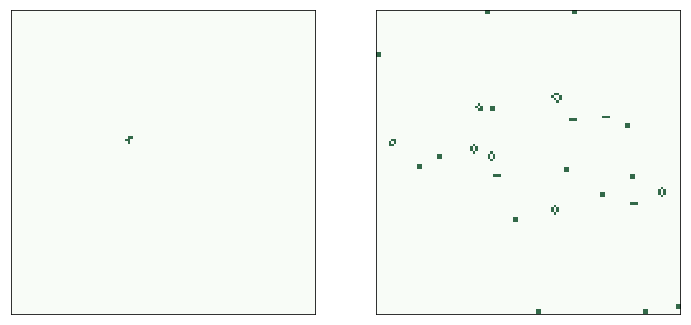

In [13]:
thinkplot.preplot(cols=2)
viewer = make_viewer(120, 120, 50, 45, *rpent)
viewer.draw()

for i in range(1103):
    viewer.step()

thinkplot.subplot(2)
viewer.draw()

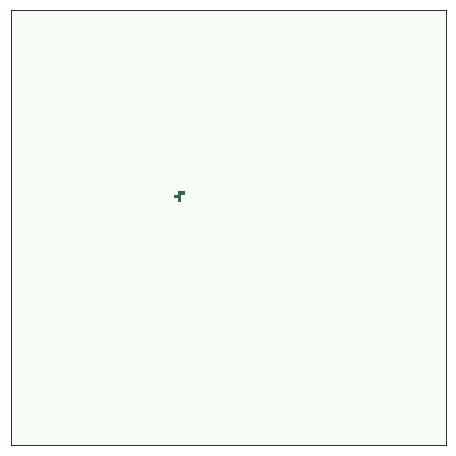

In [14]:
viewer = make_viewer(120, 120, 50, 45, *rpent)
anim = viewer.animate(frames=1200, interval=10)

In [15]:
anim

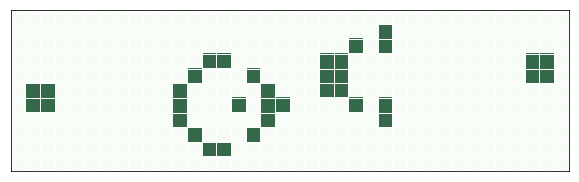

In [16]:
glider_gun = [
    '000000000000000000000000100000000000',
    '000000000000000000000010100000000000',
    '000000000000110000001100000000000011',
    '000000000001000100001100000000000011',
    '110000000010000010001100000000000000',
    '110000000010001011000010100000000000',
    '000000000010000010000000100000000000',
    '000000000001000100000000000000000000',
    '000000000000110000000000000000000000'
]
viewer = make_viewer(11, 38, 1, 1, *glider_gun)
viewer.draw(grid=True)

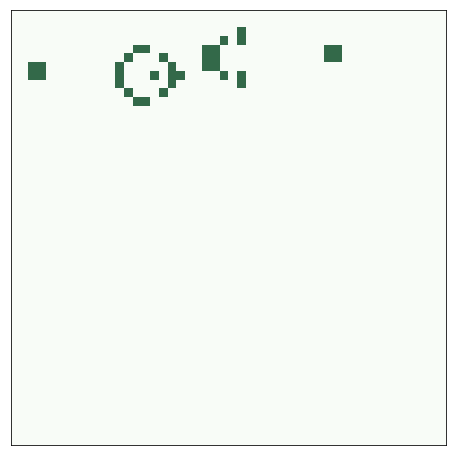

In [ ]:
viewer = make_viewer(50, 50, 2, 2, *glider_gun)
anim = viewer.animate(frames=500, interval=20)

In [ ]:
anim

# Playing god

In [ ]:
starting_grid = ['0010001101',
                 '1101010110',
                 '0000000000',
                 '0101001110',
                 '0101100000',
                 '0000000000',
                 '0101010111',
                 '0000101010',
                 '0101110110',
                 '0101010110']

viewer = make_viewer(10, 10, 0, 0, *starting_grid)
anim = viewer.animate(frames=100, interval=100)

In [ ]:
anim

In [ ]:
glider_gun_shoots_toad = [
    '00000000000000000000000010000000000000000',
    '00000000000000000000001010000000000000000',
    '00000000000011000000110000000000001100000',
    '00000000000100010000110000000000001100000',
    '11000000001000001000110000000000000000000',
    '11000000001000101100001010000000000000000',
    '00000000001000001000000010000000000000000',
    '00000000000100010000000000000000000000000',
    '00000000000011000000000000000000000000000',
    '00000000000000000000000000000000000000000',
    '00000000000000000000000000000000000000000',
    '00000000000000000000000000000000000000000',
    '00000000000000000000000000000000000000000',
    '00000000000000000000000000000000000000000',
    '00000000000000000000000000000000000000000',
    '00000000000000000000000000000000000000000',
    '00000000000000000000000000000000000000000',
    '00000000000000000000000000000000000000000',
    '00000000000000000000000000000000000000000',
    '00000000000000000000000000000000000000000',
    '00000000000000000000000000000000000000000',
    '00000000000000000000000000000000000000000',
    '00000000000000000000000000000000000000111',
    '00000000000000000000000000000000000001110',
]
viewer = make_viewer(50, 50, 2, 2, *glider_gun_shoots_toad)
anim = viewer.animate(frames=500, interval=20)

In [ ]:
anim